In [1]:
#mandatory libraries
import os
import re
import string
import numpy as np
import pandas as pd

#miscellaneous libraries
import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
from itertools import combinations

In [2]:
df = pd.read_csv('train.csv', index_col = 0)

In [3]:
df

comment_text  \
id                                                                    
0000997932d777bf  Explanation\nWhy the edits made under my usern...   
000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                                                             ...   
ffe987279560d7ff  ":::::And for the second time of asking, when ...   
ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
fff125370e4aaaf3  And it looks like it was actually you who put ...   
fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  
id                                                                          
0000997932d777bf          0                 0     0       0      0       0  
000103f0d9cfb60f          0                 0     0       0      0       0  
000113f07ec002fd          0                 0     0       0      0       0  
0001b41b1c6bb37e          0                 0     0       0      0       0  
0001d958c54c6e35          0                 0     0       0      0       0  
...                     ...               ...   ...     ...    ...     ...  
ffe987279560d7ff          0                 0     0       0      0       0  
ffea4adeee384e90          0                 0     0       0      0       0  
ffee36eab5c267c9          0                 0     0       0      0       0  
fff125370e4aaaf3          0                 0     0       0      0       0  
fff46fc426af1f9a          0                 0     0       0      0       0  

[159571 rows x 7 columns]

In [4]:
df.shape

(159571, 7)

In [5]:
df.isnull().values.any()

False

In [6]:
df.duplicated().values.any()

False

In [7]:
df.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [8]:
for i in df.columns.values[1:]:
    print(df[i].value_counts())
    print("="*50)

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


In [9]:
lbls = df.values[:,1:] #taking only target label data for all rows 
lbls=np.array(lbls,dtype=int) #converting into numpy array
col_lbls=np.unique(lbls, return_counts=True,axis=0)
col_lbls_df=pd.DataFrame(columns=df.columns.values[1:],data=col_lbls[0])
col_lbls_df['count']=col_lbls[1]
col_lbls_df=col_lbls_df.sort_values(by=['count'],ascending=False)


print("Shape of the Collective Labels (including count-column) = ",col_lbls_df.shape)
print("\n")
col_lbls_df

Shape of the Collective Labels (including count-column) =  (41, 7)




malignant  highly_malignant  rude  threat  abuse  loathe   count
0           0                 0     0       0      0       0  143346
12          1                 0     0       0      0       0    5666
22          1                 0     1       0      1       0    3800
20          1                 0     1       0      0       0    1758
14          1                 0     0       0      1       0    1215
36          1                 1     1       0      1       0     989
23          1                 0     1       0      1       1     618
6           0                 0     1       0      0       0     317
2           0                 0     0       0      1       0     301
37          1                 1     1       0      1       1     265
8           0                 0     1       0      1       0     181
34          1                 1     1       0      0       0     158
13          1                 0     0       0      0       1     136
15          1                 0     0       0      1       1     134
25          1                 0     1       1      1       0     131
16          1                 0     0       1      0       0     113
39          1                 1     1       1      1       0      64
26          1                 0     1       1      1       1      56
1           0                 0     0       0      0       1      54
27          1                 1     0       0      0       0      41
21          1                 0     1       0      0       1      35
40          1                 1     1       1      1       1      31
3           0                 0     0       0      1       1      28
4           0                 0     0       1      0       0      22
9           0                 0     1       0      1       1      18
18          1                 0     0       1      1       0      16
29          1                 1     0       0      1       0      14
31          1                 1     0       1      0       0      11
24          1                 0     1       1      0       0      11
17          1                 0     0       1      0       1       7
30          1                 1     0       0      1       1       7
35          1                 1     1       0      0       1       6
38          1                 1     1       1      0       0       4
28          1                 1     0       0      0       1       3
19          1                 0     0       1      1       1       3
7           0                 0     1       0      0       1       3
5           0                 0     0       1      1       0       3
11          0                 0     1       1      1       0       2
10          0                 0     1       1      0       0       2
32          1                 1     0       1      0       1       1
33          1                 1     0       1      1       0       1

# Balancing of DataSet

In [10]:
def label_comment (row):
    c = 0
    if row['malignant']== 1 :
        c = c + 1
    if row['highly_malignant'] == 1 :
        c = c + 1
    if row['rude'] == 1:
        c = c + 1
    if row['threat']  == 1:
        c = c + 1
    if row['abuse'] == 1:
        c = c + 1
    if row['loathe'] == 1:
        c = c + 1
    return c

In [11]:
df['tags'] = df.apply(lambda row: label_comment(row), axis=1)

In [12]:
df.head(10)

comment_text  \
id                                                                    
0000997932d777bf  Explanation\nWhy the edits made under my usern...   
000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
00040093b2687caa  alignment on this subject and which are contra...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
0000997932d777bf          0                 0     0       0      0       0   
000103f0d9cfb60f          0                 0     0       0      0       0   
000113f07ec002fd          0                 0     0       0      0       0   
0001b41b1c6bb37e          0                 0     0       0      0       0   
0001d958c54c6e35          0                 0     0       0      0       0   
00025465d4725e87          0                 0     0       0      0       0   
0002bcb3da6cb337          1                 1     1       0      1       0   
00031b1e95af7921          0                 0     0       0      0       0   
00037261f536c51d          0                 0     0       0      0       0   
00040093b2687caa          0                 0     0       0      0       0   

                  tags  
id                      
0000997932d777bf     0  
000103f0d9cfb60f     0  
000113f07ec002fd     0  
0001b41b1c6bb37e     0  
0001d958c54c6e35     0  
00025465d4725e87     0  
0002bcb3da6cb337     4  
00031b1e95af7921     0  
00037261f536c51d     0  
00040093b2687caa     0

In [13]:
at_least_one = df[df['tags'] != 0]

print(at_least_one.shape[0])

df = df.loc[df['tags'] == 0].sample(n = at_least_one.shape[0] ,random_state=42)
df = pd.concat([df, at_least_one])

16225


In [14]:
df

comment_text  \
id                                                                    
7ce2c22fd3409fbb  "\n\nOh, don't worry about me, Sandstein. I'm ...   
4e366a5778e1b5b4               Are you trying to dispute that fact?   
cd62283cfe430f72  SWOT analysis \n\nThis source – Align Technolo...   
60cdd48fb71157e6  cover \n\nso, do we want a current or older co...   
38b04f0b55ac0c31  P.S. It's probably worth setting up a template...   
...                                                             ...   
fef4cf7ba0012866  "\n\n our previous conversation \n\nyou fuckin...   
ff39a2895fc3b40e                  YOU ARE A MISCHIEVIOUS PUBIC HAIR   
ffa33d3122b599d6  Your absurd edits \n\nYour absurd edits on gre...   
ffb47123b2d82762  "\n\nHey listen don't you ever!!!! Delete my e...   
ffbdbb0483ed0841  and i'm going to keep posting the stuff u dele...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
7ce2c22fd3409fbb          0                 0     0       0      0       0   
4e366a5778e1b5b4          0                 0     0       0      0       0   
cd62283cfe430f72          0                 0     0       0      0       0   
60cdd48fb71157e6          0                 0     0       0      0       0   
38b04f0b55ac0c31          0                 0     0       0      0       0   
...                     ...               ...   ...     ...    ...     ...   
fef4cf7ba0012866          1                 0     1       0      1       1   
ff39a2895fc3b40e          1                 0     0       0      1       0   
ffa33d3122b599d6          1                 0     1       0      1       0   
ffb47123b2d82762          1                 0     0       0      1       0   
ffbdbb0483ed0841          1                 0     1       0      1       0   

                  tags  
id                      
7ce2c22fd3409fbb     0  
4e366a5778e1b5b4     0  
cd62283cfe430f72     0  
60cdd48fb71157e6     0  
38b04f0b55ac0c31     0  
...                ...  
fef4cf7ba0012866     4  
ff39a2895fc3b40e     2  
ffa33d3122b599d6     3  
ffb47123b2d82762     2  
ffbdbb0483ed0841     3  

[32450 rows x 8 columns]

In [15]:
df = df.drop(['tags'], axis=1)

In [16]:
df = df.sample(frac=1,random_state=4)

In [17]:
df

comment_text  \
id                                                                    
3de1c9874537c9f2  "\n\nMay I enquire as to \n\ni ) Your jurisdic...   
ae4f056e4859882a  You pig. \n\nWhy do you deny my people and lan...   
ab51c087b734c52f                       tharkarn and what waste man!   
330ea4bf092cfac1  stinky message \n\nmy bro fixed it fo me and i...   
305b3ee7e7771b7d                           Pic of the day Wednesday   
...                                                             ...   
a1237f726b5f5d89  Dude.\n\nPlace the following in the large text...   
15d80ed27612c40e                  Don't call me a knob, you wanker.   
390861cc8aa889af  "\nHuh, actually according to WP:PORN this has...   
ffc04458f93a74bf  This movie \nThis movie will always suck, no m...   
2276664f819b835e  , 18 November 2006 (UTC)\n\nWell comrade. Look...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  
id                                                                          
3de1c9874537c9f2          0                 0     0       0      0       0  
ae4f056e4859882a          1                 0     0       0      1       0  
ab51c087b734c52f          1                 0     0       0      0       0  
330ea4bf092cfac1          1                 1     1       0      1       1  
305b3ee7e7771b7d          0                 0     0       0      0       0  
...                     ...               ...   ...     ...    ...     ...  
a1237f726b5f5d89          0                 0     1       0      1       0  
15d80ed27612c40e          1                 0     1       0      1       0  
390861cc8aa889af          1                 0     0       0      0       0  
ffc04458f93a74bf          0                 0     0       0      0       0  
2276664f819b835e          0                 0     1       0      1       0  

[32450 rows x 7 columns]

# Exploratory Data Analysis 

In [18]:
#plotting libraries
import venn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf
import matplotlib

In [19]:
classes = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

<AxesSubplot:>

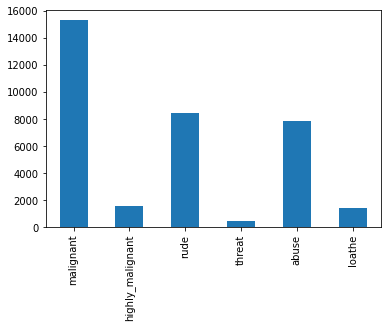

In [20]:
df[classes].sum().plot.bar()

In [21]:
def null_percentage(column):
    df_name = column.name
    nans = np.count_nonzero(column.isnull().values)
    total = column.size
    frac = nans / total
    perc = int(frac * 100)
    print('%d%% or %d missing from %s column.' % 
          (perc, nans, df_name))

def check_null(df, columns):
    for col in columns:
        null_percentage(df[col])
        
check_null(df, df.columns)

0% or 0 missing from comment_text column.
0% or 0 missing from malignant column.
0% or 0 missing from highly_malignant column.
0% or 0 missing from rude column.
0% or 0 missing from threat column.
0% or 0 missing from abuse column.
0% or 0 missing from loathe column.


In [22]:
print('%d features and %d records.' % (df.shape[1], df.shape[0]))

7 features and 32450 records.


In [23]:
print('%d features and %d records.' % (df.shape[1], df.shape[0]))
print()
targets = list(df.columns[1:])
print('Target columns: ' + ', '.join(targets))

7 features and 32450 records.

Target columns: malignant, highly_malignant, rude, threat, abuse, loathe


In [24]:
df_classes = df[list(df.columns[1:])].copy()

# How many rows are toxic? 
toxic_rows = df_classes.sum(axis=1)
toxic_rows = (toxic_rows > 0)

# Create overall any_label feature
targets.append('at_least_one')
df_classes['at_least_one'] = toxic_rows

In [25]:
count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    df_selection = df_classes[(df_classes[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts

del(df_selection)


print('Training Data Comment Breakdown')
print('%d out of %d comments, or %.2f%%, are classified as toxic.' % 
     (np.sum(toxic_rows), len(df), (np.sum(toxic_rows)/len(df))*100))

totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s comments. (%.2f%% of all data.)' % (value[0][1], key, (value[0][1]/len(df))*100))
    for cnt in value[1:]:
        print('- %d or %.2f%% were also %s.' % (cnt[1], (cnt[1]/value[0][1])*100, cnt[0]))


Training Data Comment Breakdown
16225 out of 32450 comments, or 50.00%, are classified as toxic.

15294 malignant comments. (47.13% of all data.)
- 1595 or 10.43% were also highly_malignant.
- 7926 or 51.82% were also rude.
- 449 or 2.94% were also threat.
- 7344 or 48.02% were also abuse.
- 1302 or 8.51% were also loathe.
- 15294 or 100.00% were also at_least_one.

1595 highly_malignant comments. (4.92% of all data.)
- 1595 or 100.00% were also malignant.
- 1517 or 95.11% were also rude.
- 112 or 7.02% were also threat.
- 1371 or 85.96% were also abuse.
- 313 or 19.62% were also loathe.
- 1595 or 100.00% were also at_least_one.

8449 rude comments. (26.04% of all data.)
- 7926 or 93.81% were also malignant.
- 1517 or 17.95% were also highly_malignant.
- 301 or 3.56% were also threat.
- 6155 or 72.85% were also abuse.
- 1032 or 12.21% were also loathe.
- 8449 or 100.00% were also at_least_one.

478 threat comments. (1.47% of all data.)
- 449 or 93.93% were also malignant.
- 112 or 23.4

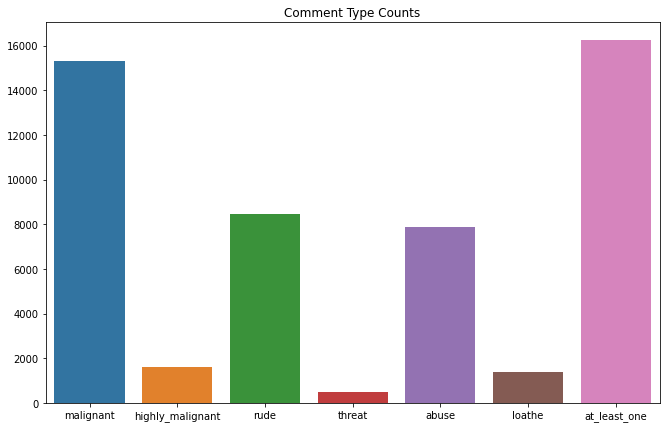

In [26]:
plt.figure('Comment Type Counts', figsize=[11,7])
plt.title('Comment Type Counts')
sns.barplot(x = list(count_dic.keys()), y = totals)
plt.show()

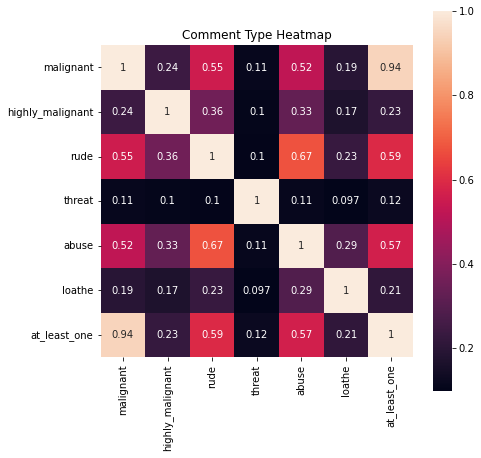

In [27]:
def heatmap(df, title):
    plt.figure('heatmap', figsize=[7, 7])
    plt.title(title)
    df_corr = df.corr()
    sns.heatmap(df_corr, square=True, annot=True)
    plt.show()

heatmap(df_classes, 'Comment Type Heatmap')

In [28]:
def label_comment (row):
    c = 0
    if row['malignant']== 1 :
        c = c + 1
    if row['highly_malignant'] == 1 :
        c = c + 1
    if row['rude'] == 1:
        c = c + 1
    if row['threat']  == 1:
        c = c + 1
    if row['abuse'] == 1:
        c = c + 1
    if row['loathe'] == 1:
        c = c + 1
    return c

In [29]:
df_classes['tags'] = df_classes.apply(lambda row: label_comment(row), axis=1)

In [30]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [31]:
df_classes.head(10)

malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
3de1c9874537c9f2          0                 0     0       0      0       0   
ae4f056e4859882a          1                 0     0       0      1       0   
ab51c087b734c52f          1                 0     0       0      0       0   
330ea4bf092cfac1          1                 1     1       0      1       1   
305b3ee7e7771b7d          0                 0     0       0      0       0   
c43481514c2c7ecf          0                 0     0       0      0       0   
686d110bc2c3627a          0                 0     0       0      0       0   
f98533474a405c0b          1                 0     1       0      1       0   
ff880f595eb4ec16          0                 0     0       0      0       0   
4e603d360e37ca2d          1                 0     1       0      1       0   

                  at_least_one  tags  
id                                    
3de1c9874537c9f2         False     0  
ae4f056e4859882a          True     2  
ab51c087b734c52f          True     1  
330ea4bf092cfac1          True     5  
305b3ee7e7771b7d         False     0  
c43481514c2c7ecf         False     0  
686d110bc2c3627a         False     0  
f98533474a405c0b          True     3  
ff880f595eb4ec16         False     0  
4e603d360e37ca2d          True     3

In [32]:
df_classes['tags'].iplot()

In [33]:
# pip install chart_studio

In [34]:
df_classes['tags'].value_counts().iplot(kind = 'bar', xTitle ='Depatment', yTitle = 'count')

In [35]:
from textblob import TextBlob
import plotly as py
import cufflinks as cf
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1,1), stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]

In [37]:
df

comment_text  \
id                                                                    
3de1c9874537c9f2  "\n\nMay I enquire as to \n\ni ) Your jurisdic...   
ae4f056e4859882a  You pig. \n\nWhy do you deny my people and lan...   
ab51c087b734c52f                       tharkarn and what waste man!   
330ea4bf092cfac1  stinky message \n\nmy bro fixed it fo me and i...   
305b3ee7e7771b7d                           Pic of the day Wednesday   
...                                                             ...   
a1237f726b5f5d89  Dude.\n\nPlace the following in the large text...   
15d80ed27612c40e                  Don't call me a knob, you wanker.   
390861cc8aa889af  "\nHuh, actually according to WP:PORN this has...   
ffc04458f93a74bf  This movie \nThis movie will always suck, no m...   
2276664f819b835e  , 18 November 2006 (UTC)\n\nWell comrade. Look...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  
id                                                                          
3de1c9874537c9f2          0                 0     0       0      0       0  
ae4f056e4859882a          1                 0     0       0      1       0  
ab51c087b734c52f          1                 0     0       0      0       0  
330ea4bf092cfac1          1                 1     1       0      1       1  
305b3ee7e7771b7d          0                 0     0       0      0       0  
...                     ...               ...   ...     ...    ...     ...  
a1237f726b5f5d89          0                 0     1       0      1       0  
15d80ed27612c40e          1                 0     1       0      1       0  
390861cc8aa889af          1                 0     0       0      0       0  
ffc04458f93a74bf          0                 0     0       0      0       0  
2276664f819b835e          0                 0     1       0      1       0  

[32450 rows x 7 columns]

In [38]:
def find_graph(s, title):
    df_m = df[df[s] == 1]
    words = get_top_n_words(df_m['comment_text'], 30)
    df1 = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
    df1 = df1.set_index('Unigram')
    return df1.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = title)

In [39]:
find_graph('malignant', 'Top 30 words for Malignant')
find_graph('highly_malignant', 'Top 30 words for Highly Malignant')
find_graph('rude', 'Top 30 words for Rude')
find_graph('abuse', 'Top 30 words for Abuse')
find_graph('loathe','Top 30 words for Loathe')

In [40]:
import plotly.express as px
import plotly.graph_objects as go

In [41]:
df['comment_len'] = df['comment_text'].apply(lambda x : len(x))

In [42]:
df.head(5)

comment_text  \
id                                                                    
3de1c9874537c9f2  "\n\nMay I enquire as to \n\ni ) Your jurisdic...   
ae4f056e4859882a  You pig. \n\nWhy do you deny my people and lan...   
ab51c087b734c52f                       tharkarn and what waste man!   
330ea4bf092cfac1  stinky message \n\nmy bro fixed it fo me and i...   
305b3ee7e7771b7d                           Pic of the day Wednesday   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
3de1c9874537c9f2          0                 0     0       0      0       0   
ae4f056e4859882a          1                 0     0       0      1       0   
ab51c087b734c52f          1                 0     0       0      0       0   
330ea4bf092cfac1          1                 1     1       0      1       1   
305b3ee7e7771b7d          0                 0     0       0      0       0   

                  comment_len  
id                             
3de1c9874537c9f2           91  
ae4f056e4859882a           66  
ab51c087b734c52f           28  
330ea4bf092cfac1          654  
305b3ee7e7771b7d           24

In [43]:
for t in targets:
    print("______________________________________","Class: %s" % t, "______________________________________")
    b = np.where(df_classes[t]==1)[0]
    selection = np.random.choice(b, 5)
    i = 1
    for s in selection:
        print(i, ".", df.comment_text.iloc[s])
        i+=1
        print("------------")
    print()
    
b = np.where(df_classes.at_least_one==0)[0]
selection = np.random.choice(b, 5)
print("______________________________________ Clean comments ______________________________________\n")
i = 1
for s in selection:
    print(i, ".", df.comment_text.iloc[s])
    i+=1
    print("------------")

______________________________________ Class: malignant ______________________________________
1 . I agree with the previous assessment about that swine Bill Connolley.  He blocked me earlier this week for doing next to nothing.  I was just attempting to make a page better, and he abused his power to reinforce his personal point of view.  Among administrators, he has some of the worst judgement on all of wikipedia, and I regard him as a swine of the lowest order.
------------
2 . I know I should commit suicide, but I'm not totally sure. I'm still thinking about joining the homosexual agenda and sucking cocks for a living. Perhaps that is my cup of tea? Hrm. Yeah. Sucking dicks is my bag.
------------
3 . Hey Fuck u bitch...i dont suck nuts \, linkin park does!
------------
4 . ==Almost Famous==

You are NOT and administrator, and therefore you have no right to restore anything on MY talk page.  You have no RIGHT to WARN me.  This is MY WARNING TO YOU!  STAY THE FUCK AWAY!
------------


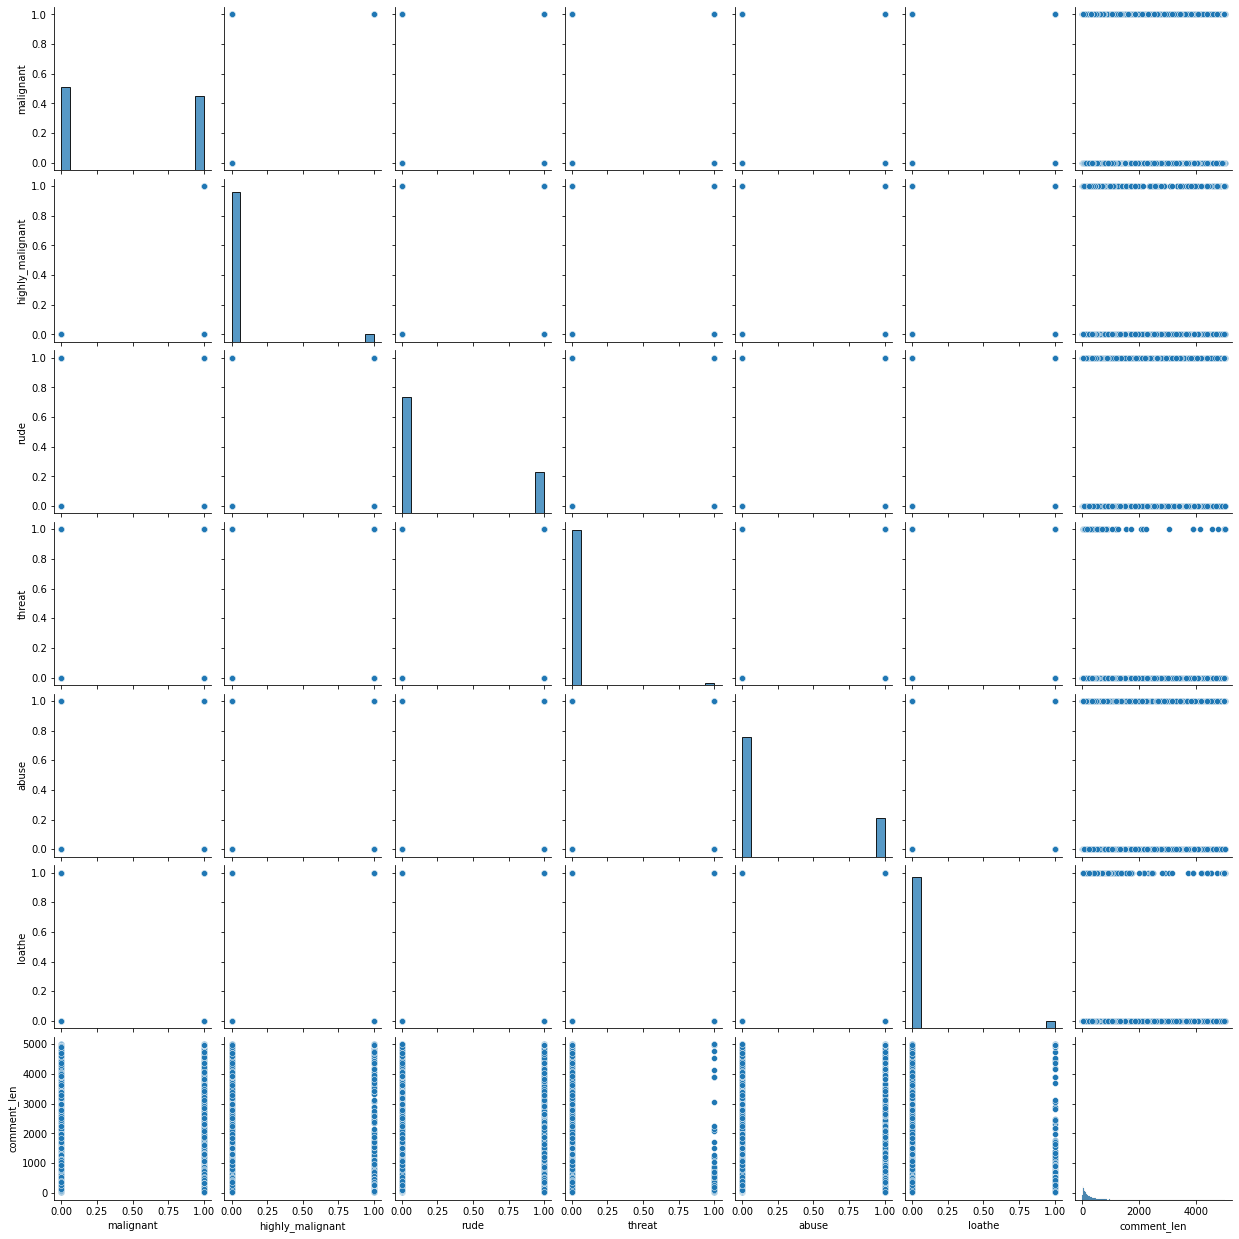

In [44]:
sns.pairplot(df)

In [45]:
df['length'] = df.comment_text.apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(df[(df_classes.at_least_one==1)].length)))
print("Average clean comment length: %d" % int(np.mean(df[(df_classes.at_least_one==0)].length)))

Average toxic comment length: 303
Average clean comment length: 403


In [46]:
df['length'] = df.comment_text.apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(df[(df_classes.at_least_one==1)].length)))
print("Average clean comment length: %d" % int(np.mean(df[(df_classes.at_least_one==0)].length)))

Average toxic comment length: 303
Average clean comment length: 403


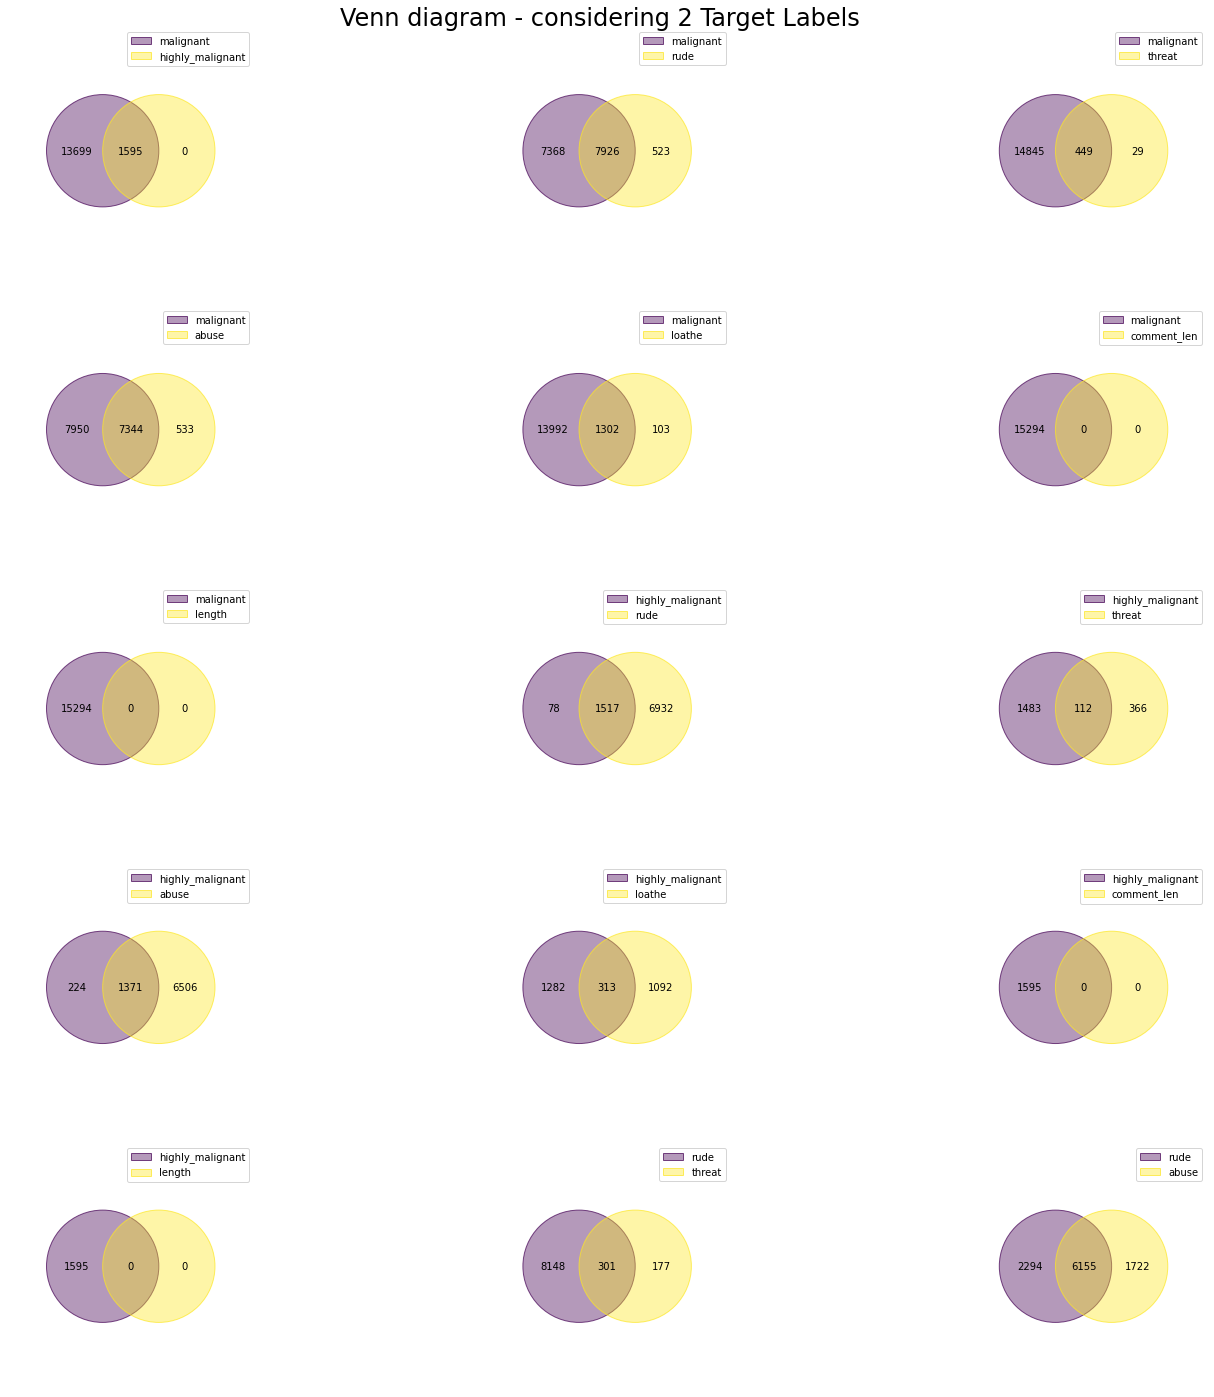

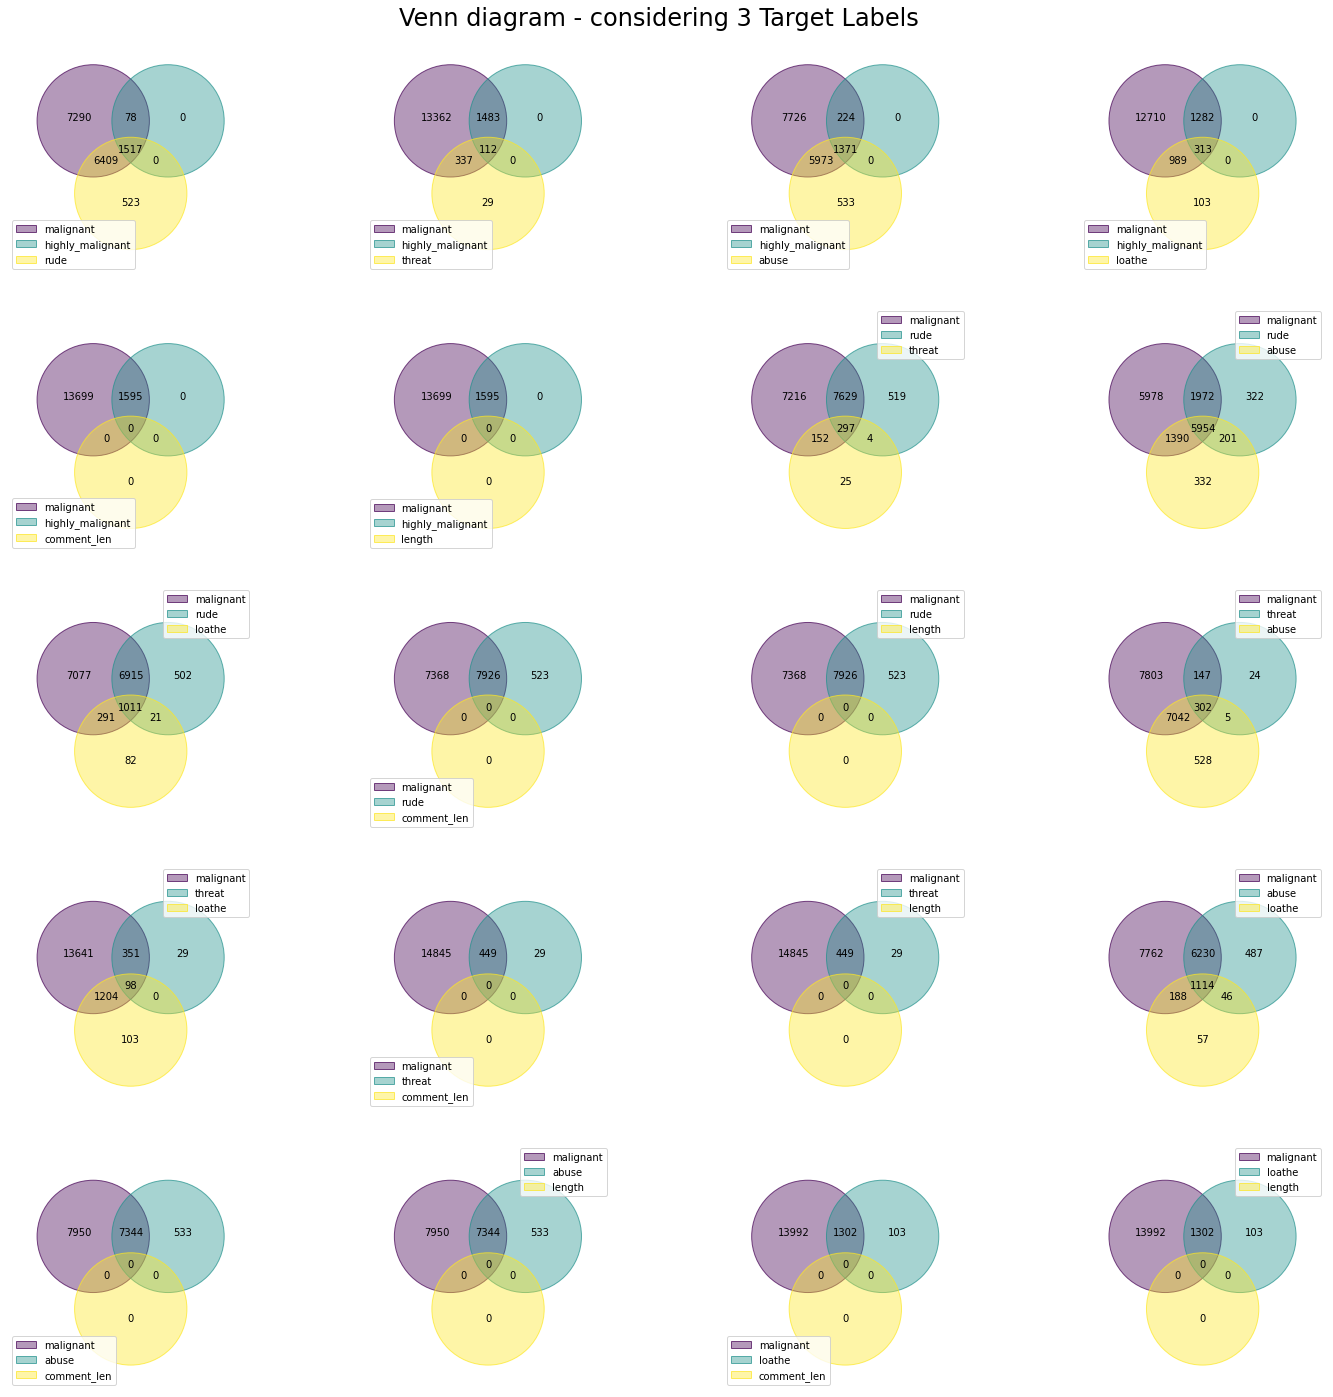

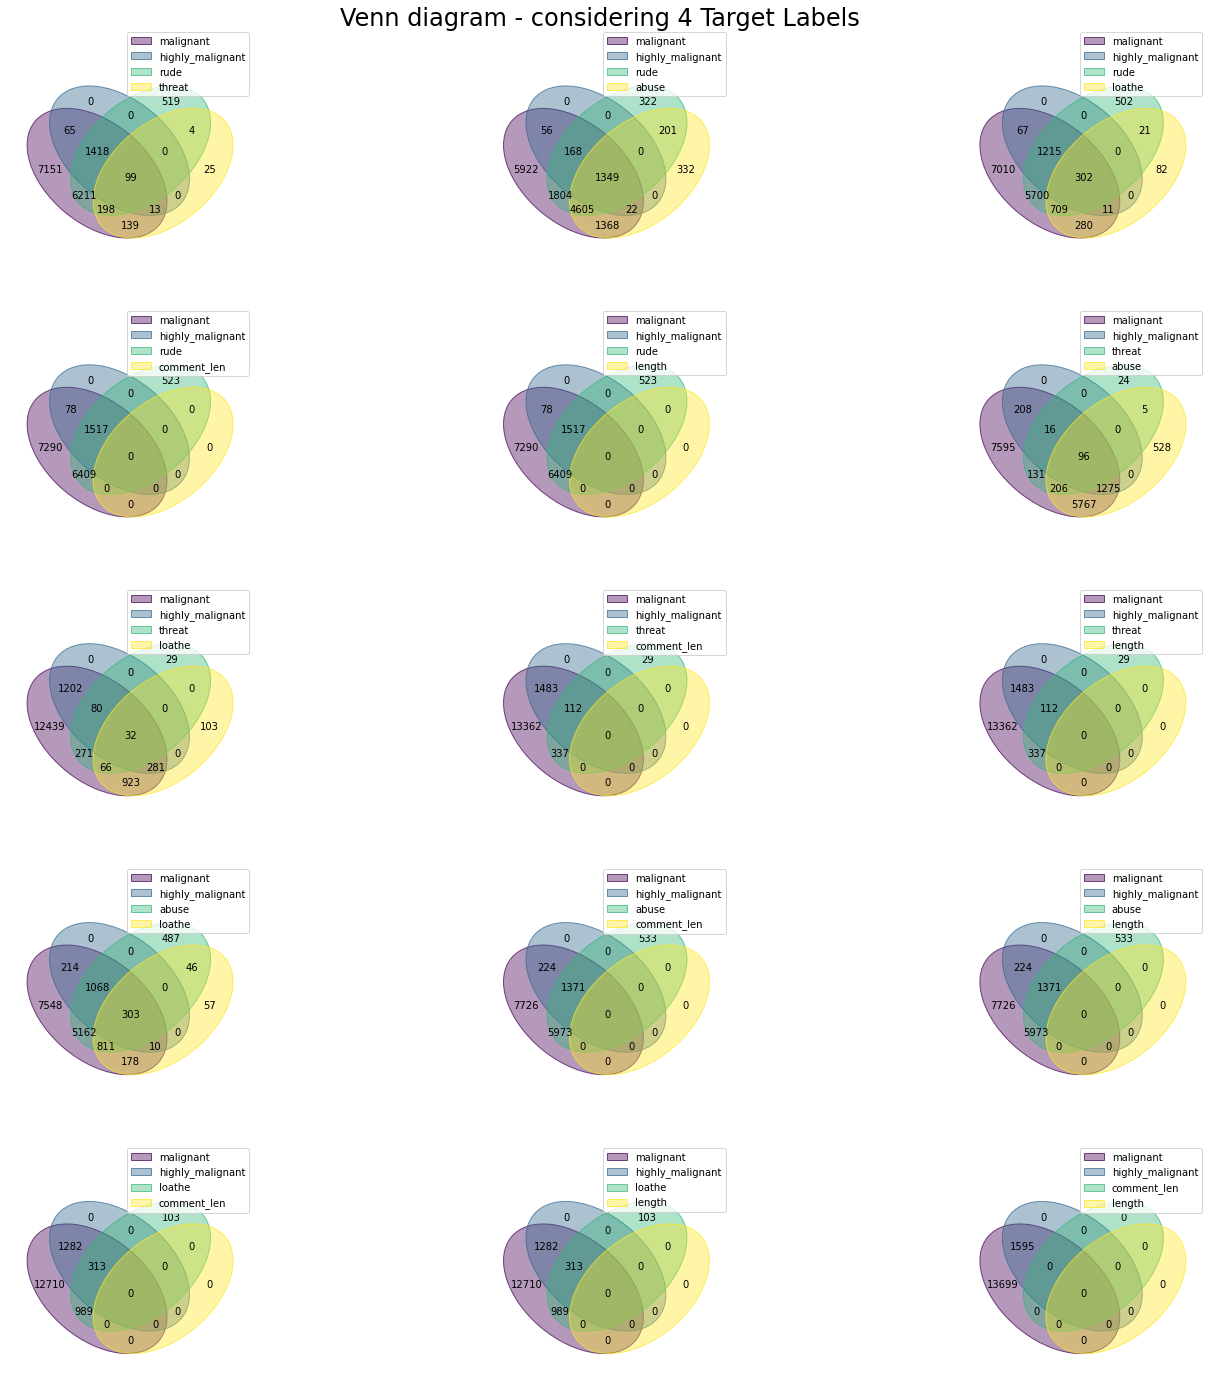

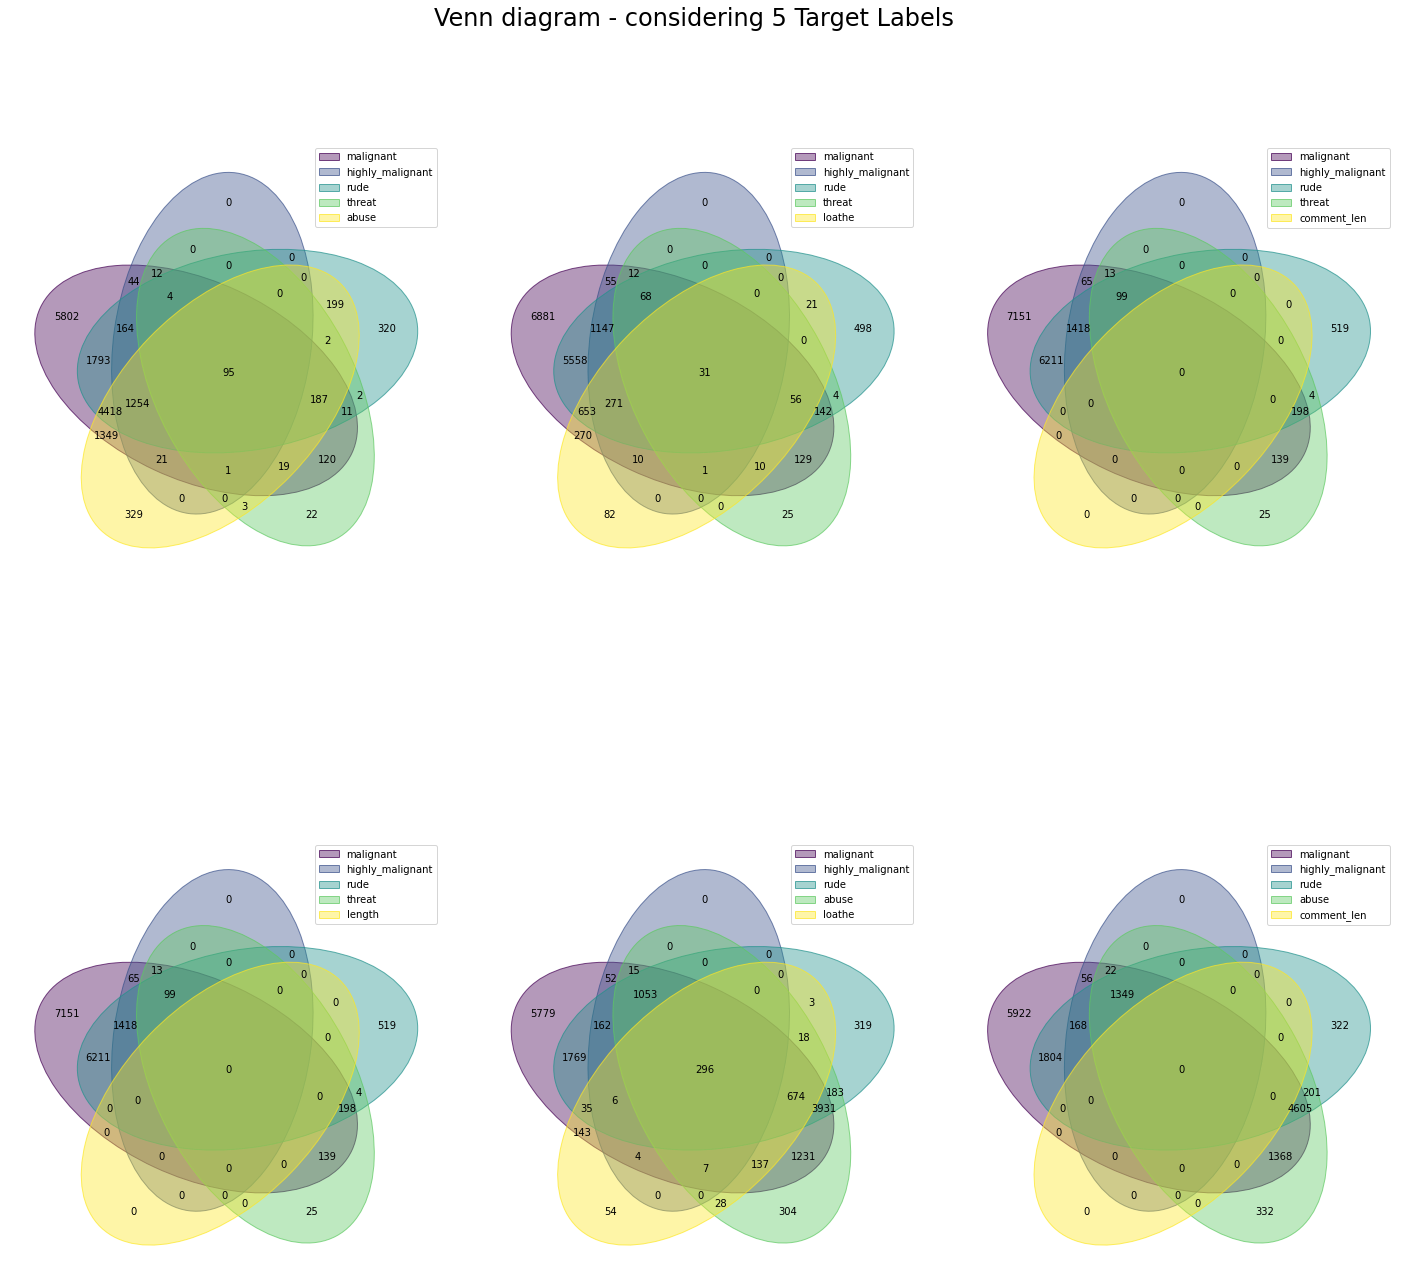

In [47]:
no_of_labels= np.arange(2,6)
rows_col=[(5,3),(5,4),(5,3),(2,3)]


for i,rc in zip(no_of_labels,rows_col):
    comb = combinations(df.columns.values[1:], i)
    fig, top_axs = plt.subplots(ncols=rc[1], nrows=rc[0],figsize=(20, 20))
    fig.suptitle("Venn diagram - considering "+str(i)+" Target Labels",fontsize=24)
    fig.subplots_adjust(top=0.88)
    fig.tight_layout()
    top_axs=top_axs.flatten()
    for j,ax in zip(list(comb),top_axs):
        data_set=dict()
        for k in j:
            data_set[k]=set(df[(df[k]==1)].index)
        venn_dgrm=venn.venn(data_set,legend_loc="best",alpha=0.4,fontsize=10,ax=ax)

# Data Preprocessing and Data Cleaning

In [48]:
#NLTK libraries  & for data cleaning

import contractions
import nltk
from nltk.tree import Tree
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS

In [49]:
#Using GENSIM package for data cleaning

from gensim.parsing.preprocessing import strip_multiple_whitespaces
from gensim.parsing.preprocessing import strip_punctuation
from gensim.parsing.preprocessing import strip_numeric

In [50]:
def convert_to_lower_case(text):
    return text.lower()

In [51]:
def remove_escape_char(text):
    return re.sub(r"[\n\t\\\/]"," ",text, flags=re.MULTILINE)

In [52]:
#Since BeautifulSoup takes more time than regex

def remove_html_tags(text):
    return re.sub(r"<.*>"," ",text, flags=re.MULTILINE)

In [53]:
def remove_links(text):
    text= re.sub(r"http\S+"," ",text, flags=re.MULTILINE)

    return re.sub(r"www\S+"," ",text, flags=re.MULTILINE)

In [54]:
def remove_digits(text):
    return strip_numeric(text)

In [55]:
def remove_punctuation(text):
    return strip_punctuation(text)

In [56]:
def chuncking(text):
    chunks_data=[]
    chunks_data=(list(ne_chunk(pos_tag(word_tokenize(text)))))
    for label in chunks_data:
        if type(label) ==Tree:
            if label.label() == "GPE":
                a = label.leaves()
                if len(a)>1:
                    gpe = "_".join([term for term,pos in a])
                    text = re.sub(rf'{a[1][0]}',gpe,text, flags=re.MULTILINE)
                    text = re.sub(rf'\b{a[0][0]}\b'," ",text, flags=re.MULTILINE)
            if label.label()=="PERSON":      
                for term,pog in label.leaves():
                    text = re.sub(re.escape(term)," ",text, flags=re.MULTILINE)
    return text

In [57]:
def keep_alpha_and_underscore(text):    
    return re.sub(r"[^a-zA-Z_]"," ",text,flags=re.MULTILINE)

In [58]:
def remove_repeated_characters(text):
    return re.sub(r"(\w)(\1{2,})","\\1",text,flags=re.MULTILINE)

In [59]:
def remove_words_length_less_than_2(text):
    text = re.sub(r'\b\w{1,2}\b'," ",text)
    return text

In [60]:
def decontraction(text):
    res=""
    for word in text.split():
        try:
            con_text = contractions.fix(word)
            if con_text.lower() is word.lower():
                res=res+word+" "
            else:
                res=res+con_text+" "
        
        except:
            con_text=contractions.fix(word.lower())
            if con_text.lower() is word.lower():
                res=res+word+" "
            else:
                res=res+con_text+" "
    return res.strip()

In [61]:
def remove_whitespaces(text):
    return strip_multiple_whitespaces(text)

In [62]:
stop_words=stopwords.words('english')

final_stop_words=list(STOPWORDS.union(set(stop_words)))
final_stop_words.extend(["mr","mrs","miss",
                        "one","two","three","four","five",
                        "six","seven","eight","nine","ten",
                        "us","also","dont","cant","any","can","along",
                        "among","during","anyone",
                         "a","b","c","d","e","f","g","h","i","j","k","l","m",
                         "n","o","p","q","r","s","t","u","v","w","x","y","z","hi","hello","hey","ok",
                         "okay","lol","rofl","hola","let","may","etc"])

In [63]:
lemmatiser = WordNetLemmatizer()

In [64]:
def preprocess(text):
    preprocessed_text = []
    for each_text in tqdm(text):
        result = remove_links(each_text)
        result = remove_html_tags(result)
        result = remove_escape_char(result)        
        result = remove_digits(result)
        result = decontraction(result)
        result = remove_punctuation(result)
        result = chuncking(result)
        result = convert_to_lower_case(result)
        result = ' '.join(non_stop_word for non_stop_word in result.split() if non_stop_word not in final_stop_words)
        result = keep_alpha_and_underscore(result)
        result = remove_repeated_characters(result)
        result = remove_whitespaces(result)
        result = remove_words_length_less_than_2(result)
        result = ' '.join(lemmatiser.lemmatize(word,pos="v") for word in result.split())
        preprocessed_text.append(result.strip())
        
    return preprocessed_text

In [65]:
indices=np.random.randint(len(df['comment_text'].values),size=5)
indices= np.append(indices, 32449)

for i in indices:
    print(i," - Original Text ---> ",df['comment_text'].values[i])
    print(i," - Processed Text ---> ",preprocess([df['comment_text'].values[i]]))
    print("="*270)

24742  - Original Text --->  "

 It's still full of it - Never before or since has a cartoonist been so perfect for the times.  I mean, really!      ... speak! ...  "


  0%|          | 0/1 [00:00<?, ?it/s]

24742  - Processed Text --->  ['still full never cartoonist perfect time mean really speak']
9734  - Original Text --->  WIKIPEIDA ADMINNAIZSI

STOP HARASSING ME'

LEAVE ME ALONE

IT IS CRHISTMAST

MASTURBATE AND GOT O BED

LEAVE ME ALONE

TAKE OUT YOUR MOMMY ISSUES ON SOMNEONE ELSE WHJO GIVES A S**T UR P3NIZ IS SMLALL


  0%|          | 0/1 [00:00<?, ?it/s]

9734  - Processed Text --->  ['wikipeida adminnaizsi stop harass leave alone crhistmast masturbate get bed leave alone take mommy issue somneone whjo give pniz smlall']
27796  - Original Text --->  Just to clarify - since I proposed ALT9 and the sourcing of this article hasn't been entirely straightforward, I won't be confirming it; I'll leave it to others to consider whether the article is appropriately sourced. Ucucha


  0%|          | 0/1 [00:00<?, ?it/s]

27796  - Processed Text --->  ['clarify propose alt source article entirely straightforward confirm leave others consider whether article appropriately source ucucha']
16280  - Original Text --->  Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with Angela. Billj is a Dumbass for deleting my messages. Sannse is a big fat bitch for not leaving the users alone along with An

  0%|          | 0/1 [00:00<?, ?it/s]

16280  - Processed Text --->  ['big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone dumbass delete message big fat bitch leave users alone d

  0%|          | 0/1 [00:00<?, ?it/s]

216  - Processed Text --->  ['fat kid love cake']
32449  - Original Text --->  , 18 November 2006 (UTC)

Well comrade. Look at this way. Fight Dem Back is very mush controlled by bias communists. They must be stop from posting crap and lies on Fight Dem Back. Plus Wikipedia has become a dictatorship of the idiots. The Wikipedia dictatorship must be ended and democracy re-started. Pleas restor the deletion thing on FDB article.  07:58


  0%|          | 0/1 [00:00<?, ?it/s]

32449  - Processed Text --->  ['november utc well comrade way mush control bias communists must stop post crap lie become dictatorship idiots dictatorship must end democracy start restor deletion thing fdb article']


In [66]:
preprocessed_data = preprocess(df['comment_text'].values)

  0%|          | 0/32450 [00:00<?, ?it/s]

In [67]:
# clean_data = df.set_index(keys="id", drop = True)
df['comment_text'] = preprocessed_data
df.sample(5)

comment_text  \
id                                                                    
f43cc3000172b68c                                    piss evil dwarf   
3d70b1f15afd1925  write know publicly experimental group use pow...   
934dd56a4dd906fc                              remove warn full shit   
2e05268c1721979a  signpost spamlist name next mine erase name mu...   
78d95ac8e437d03a                                        know fembot   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
f43cc3000172b68c          1                 0     1       0      1       0   
3d70b1f15afd1925          1                 0     0       0      0       0   
934dd56a4dd906fc          1                 0     1       0      0       0   
2e05268c1721979a          0                 0     0       0      0       0   
78d95ac8e437d03a          0                 0     0       0      0       0   

                  comment_len  length  
id                                     
f43cc3000172b68c           23      23  
3d70b1f15afd1925          221     221  
934dd56a4dd906fc           57      57  
2e05268c1721979a          152     152  
78d95ac8e437d03a           32      32

In [68]:
df.to_csv("cleaned_data.csv", header=True, index=False)

In [69]:
df

comment_text  \
id                                                                    
3de1c9874537c9f2            enquire jurisdiction reason thank craic   
ae4f056e4859882a                    pig deny people language racist   
ab51c087b734c52f                                 tharkarn waste man   
330ea4bf092cfac1  stinky message bro fix spell straight many edi...   
305b3ee7e7771b7d                                  pic day wednesday   
...                                                             ...   
a1237f726b5f5d89  place follow large text box please stop rap li...   
15d80ed27612c40e                                   call knob wanker   
390861cc8aa889af  huh actually accord porn issue image delete ba...   
ffc04458f93a74bf  movie movie always suck matter much article tr...   
2276664f819b835e  november utc well comrade way mush control bia...   

                  malignant  highly_malignant  rude  threat  abuse  loathe  \
id                                                                           
3de1c9874537c9f2          0                 0     0       0      0       0   
ae4f056e4859882a          1                 0     0       0      1       0   
ab51c087b734c52f          1                 0     0       0      0       0   
330ea4bf092cfac1          1                 1     1       0      1       1   
305b3ee7e7771b7d          0                 0     0       0      0       0   
...                     ...               ...   ...     ...    ...     ...   
a1237f726b5f5d89          0                 0     1       0      1       0   
15d80ed27612c40e          1                 0     1       0      1       0   
390861cc8aa889af          1                 0     0       0      0       0   
ffc04458f93a74bf          0                 0     0       0      0       0   
2276664f819b835e          0                 0     1       0      1       0   

                  comment_len  length  
id                                     
3de1c9874537c9f2           91      91  
ae4f056e4859882a           66      66  
ab51c087b734c52f           28      28  
330ea4bf092cfac1          654     654  
305b3ee7e7771b7d           24      24  
...                       ...     ...  
a1237f726b5f5d89          125     125  
15d80ed27612c40e           33      33  
390861cc8aa889af         1058    1058  
ffc04458f93a74bf          248     248  
2276664f819b835e          358     358  

[32450 rows x 9 columns]

## Cleaned Data.

##### Here we remove all the null values (if any), after the noise in the data is cleared, and the dataset is made simple and effiecient to use

In [70]:
clean_data = pd.read_csv("cleaned_data.csv")

In [71]:
clean_data

comment_text  malignant  \
0                enquire jurisdiction reason thank craic          0   
1                        pig deny people language racist          1   
2                                     tharkarn waste man          1   
3      stinky message bro fix spell straight many edi...          1   
4                                      pic day wednesday          0   
...                                                  ...        ...   
32445  place follow large text box please stop rap li...          0   
32446                                   call knob wanker          1   
32447  huh actually accord porn issue image delete ba...          1   
32448  movie movie always suck matter much article tr...          0   
32449  november utc well comrade way mush control bia...          0   

       highly_malignant  rude  threat  abuse  loathe  comment_len  length  
0                     0     0       0      0       0           91      91  
1                     0     0       0      1       0           66      66  
2                     0     0       0      0       0           28      28  
3                     1     1       0      1       1          654     654  
4                     0     0       0      0       0           24      24  
...                 ...   ...     ...    ...     ...          ...     ...  
32445                 0     1       0      1       0          125     125  
32446                 0     1       0      1       0           33      33  
32447                 0     0       0      0       0         1058    1058  
32448                 0     0       0      0       0          248     248  
32449                 0     1       0      1       0          358     358  

[32450 rows x 9 columns]

In [72]:
clean_data.isnull().values.any()

True

In [73]:
index=clean_data[clean_data['comment_text'].isnull()].index

In [74]:
len(index)

80

In [75]:
clean_data.dropna(inplace=True)

In [76]:
clean_data.isnull().values.any()

False

In [77]:
clean_data = clean_data.drop(['comment_len'], axis=1)
clean_data = clean_data.drop(['length'], axis=1)

In [78]:
clean_data.shape

(32370, 7)

In [79]:
clean_data.to_csv("cleaned_data_pre_processed_1.csv", header=True, index=False)

In [80]:
clean_data

comment_text  malignant  \
0                enquire jurisdiction reason thank craic          0   
1                        pig deny people language racist          1   
2                                     tharkarn waste man          1   
3      stinky message bro fix spell straight many edi...          1   
4                                      pic day wednesday          0   
...                                                  ...        ...   
32445  place follow large text box please stop rap li...          0   
32446                                   call knob wanker          1   
32447  huh actually accord porn issue image delete ba...          1   
32448  movie movie always suck matter much article tr...          0   
32449  november utc well comrade way mush control bia...          0   

       highly_malignant  rude  threat  abuse  loathe  
0                     0     0       0      0       0  
1                     0     0       0      1       0  
2                     0     0       0      0       0  
3                     1     1       0      1       1  
4                     0     0       0      0       0  
...                 ...   ...     ...    ...     ...  
32445                 0     1       0      1       0  
32446                 0     1       0      1       0  
32447                 0     0       0      0       0  
32448                 0     0       0      0       0  
32449                 0     1       0      1       0  

[32370 rows x 7 columns]

# TF-IDF

##### We use TFIDF vector for converting words to numerics, and hence comparing it with the sentiments of the comment or the labels of the labels of the comment_text.

## With TFIDF-Vectorizer

In [81]:
#sk-learn libraries for vectorization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
#sk-learn libraries for regression and OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [83]:
try_tfidf = pd.read_csv("cleaned_data_pre_processed_1.csv")

In [84]:
try_tfidf

comment_text  malignant  \
0                enquire jurisdiction reason thank craic          0   
1                        pig deny people language racist          1   
2                                     tharkarn waste man          1   
3      stinky message bro fix spell straight many edi...          1   
4                                      pic day wednesday          0   
...                                                  ...        ...   
32365  place follow large text box please stop rap li...          0   
32366                                   call knob wanker          1   
32367  huh actually accord porn issue image delete ba...          1   
32368  movie movie always suck matter much article tr...          0   
32369  november utc well comrade way mush control bia...          0   

       highly_malignant  rude  threat  abuse  loathe  
0                     0     0       0      0       0  
1                     0     0       0      1       0  
2                     0     0       0      0       0  
3                     1     1       0      1       1  
4                     0     0       0      0       0  
...                 ...   ...     ...    ...     ...  
32365                 0     1       0      1       0  
32366                 0     1       0      1       0  
32367                 0     0       0      0       0  
32368                 0     0       0      0       0  
32369                 0     1       0      1       0  

[32370 rows x 7 columns]

In [85]:
train, test = train_test_split(try_tfidf, random_state=42, test_size=0.30, shuffle=True)

In [86]:
train_text = train['comment_text']
test_text = test['comment_text']

In [87]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [88]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['comment_text'], axis=1)

In [89]:
categories = list(try_tfidf.columns.values)
categories = categories[1:]

In [90]:
#metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc,roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

#modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [91]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None), n_jobs=-1)),])

print("================= Using MultiNomial Naive Bayes =================")
i = 1
for category in categories:
    print('*', i, 'Processing {} comments...'.format(category))
    i+=1
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print()


LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),])

print("================= Using Linear SVC =================")
i = 1
for category in categories:
    print('*',i, 'Processing {} comments...'.format(category))
    i+=1
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print()
    
    
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),])

print("================= Using Logistic Regression =================")
i = 1
for category in categories:
    print('*',i, 'Processing {} comments...'.format(category))
    i+=1
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print()

================= Using MultiNomial Naive Bayes =================
* 1 Processing malignant comments...
Test accuracy is 0.8487282463186078

* 2 Processing highly_malignant comments...
Test accuracy is 0.9499536607970342

* 3 Processing rude comments...
Test accuracy is 0.797343219029966

* 4 Processing threat comments...
Test accuracy is 0.9860982391102873

* 5 Processing abuse comments...
Test accuracy is 0.7794253938832252

* 6 Processing loathe comments...
Test accuracy is 0.9581917413242714

================= Using Linear SVC =================
* 1 Processing malignant comments...
Test accuracy is 0.8517145505097312

* 2 Processing highly_malignant comments...
Test accuracy is 0.9490268767377201

* 3 Processing rude comments...
Test accuracy is 0.8627329832149109

* 4 Processing threat comments...
Test accuracy is 0.9868190711564205

* 5 Processing abuse comments...
Test accuracy is 0.8184533003810113

* 6 Processing loathe comments...
Test accuracy is 0.9610750695088045

==========

In [92]:

print("initialize classifier chains multi-label classifier")
# classifier = ClassifierChain(LogisticRegression())

print("Training logistic regression model on train data")
# classifier.fit(x_train, y_train)

print("predict")
# predictions = classifier.predict(x_test)

print("accuracy")
# print("Accuracy = ",accuracy_score(y_test,predictions))

initialize classifier chains multi-label classifier
Training logistic regression model on train data
predict
accuracy


##### We cannot use the simple TD-IDF Function since, it the space - time complexity increases. Hence, we have to use GloVe

## With GloVe

In [93]:
#multi-processing
import multiprocessing
from multiprocessing import Pool,freeze_support
from multiprocessing import Process

#multi-label 
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

#metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import f1_score

#modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [94]:
clean_data=pd.read_csv("cleaned_data_pre_processed_1.csv")

In [95]:
clean_data.shape

(32370, 7)

In [96]:
clean_data.sample(3)

comment_text  malignant  \
14947  tedrow brothers dear ylee much trouble provide...          0   
12137      get warn ban mention term use personal insult          0   
21     hornbook new law relate task force curriculum ...          0   

       highly_malignant  rude  threat  abuse  loathe  
14947                 0     0       0      0       0  
12137                 0     0       0      0       0  
21                    0     0       0      0       0

In [97]:
X=clean_data['comment_text']
y=clean_data.drop(columns=['comment_text'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [99]:
print("Shape of X-Train",X_train.shape)
print("Shape of X-Test",X_test.shape)
print("Shape of y-Train",y_train.shape)
print("Shape of y-Test",y_test.shape)

Shape of X-Train (22659,)
Shape of X-Test (9711,)
Shape of y-Train (22659, 6)
Shape of y-Test (9711, 6)


In [100]:
def change_y(data):

    """"function to convert multiple y labels as single y label"""
    res=[]
    for row in data:
        if (sum(row)==0):
            res.append(0)
        else:
            res.append(1)
    return np.array(res)

In [101]:
y_train_tsne=change_y(y_train.values)
y_test_tsne=change_y(y_test.values)
#converting multi y label to single y label
print("Shape of y-Train",y_train_tsne.shape)
print("Shape of y-Test",y_test_tsne.shape)

Shape of y-Train (22659,)
Shape of y-Test (9711,)


In [102]:
# here we are using Glove which gives output of 300 dimensions
# loading words and their corresponding w2v representation.

w2v_dict = dict()
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')     
    w2v_dict[word] = vec
f.close()
print('Loaded %s word vectors.' % len(w2v_dict))
w2v_words =  set(w2v_dict.keys())


Loaded 400000 word vectors.


In [103]:
# TF-IDF vectorizer

vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1),stop_words=final_stop_words,use_idf=True)
vectorizer.fit(X_train)

TfidfVectorizer(min_df=10,
                stop_words=['here', 'such', 'off', 'its', 'these', 'any', 'do',
                            'himself', "she'll", "wouldn't", "you're", 'should',
                            'the', "haven't", 'which', 'didn', 'was', 'ever',
                            'why', 'who', 'but', 'ought', 'were', 'under',
                            "won't", 'once', 'am', "can't", 'yourselves',
                            "mightn't", ...])

In [104]:
# we are converting a dictionary with word as a key, and the idf as a value

tfidf_dict = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_words = set(vectorizer.get_feature_names())

In [105]:
#function to calculate TF-IDF weighted avg W2V

def comp_tfidf_weighted_w2v(data, w2v_words, tfidf_words, w2v_dict, tfidf_dict):    
    tfidf_w2v = []
    for sentence in tqdm(data):
        vector = np.zeros(300) 
        # as word vectors are of zero length
        tf_idf_weight =0;
        # num of words with a valid vector in the sentence/review
        try:
            for word in sentence.split():
                # for each word in a review/sentence
                if (word in w2v_words) and (word in tfidf_words):
                    vec = w2v_dict[word]
                    # getting the vector for each word
                    # here we are multiplying idf value(dictionary[word]) and 
                    #the tf value((sentence.count(word)/len(sentence.split())))
                    tf_idf = tfidf_dict[word]*(sentence.count(word)/len(sentence.split()))
                    # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
        except:
            tf_idf_weight =0
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    return np.array(tfidf_w2v)

In [106]:
X_train_tfidf_w2v = comp_tfidf_weighted_w2v(X_train, w2v_words, tfidf_words, w2v_dict, tfidf_dict)
X_test_tfidf_w2v = comp_tfidf_weighted_w2v(X_test, w2v_words, tfidf_words, w2v_dict, tfidf_dict)

  0%|          | 0/22659 [00:00<?, ?it/s]

  0%|          | 0/9711 [00:00<?, ?it/s]

In [107]:
print("Shape of X-Train data=",X_train_tfidf_w2v.shape)
print("Shape of X-Test data=",X_test_tfidf_w2v.shape)

Shape of X-Train data= (22659, 300)
Shape of X-Test data= (9711, 300)


##### After finding the tfidf with word to vector using GloVe 100B, we compare different algorithms, with different types of multilabel classifications algorithms

In [108]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(LogisticRegression(solver='lbfgs'))

# train
classifier.fit(X_train_tfidf_w2v, y_train)

# predict
predictions = classifier.predict(X_test_tfidf_w2v)

# accuracy
print("Accuracy = ",accuracy_score(y_test, predictions))
print("F1 score = ",f1_score(y_test, predictions, average = 'macro'))
print("F1 score = ",f1_score(y_test, predictions, average = 'micro'))
print("F1 score = ",f1_score(y_test, predictions, average = 'weighted'))

# print("Accuracy = ",f1_score(y_test.get_label, predictions))

Accuracy =  0.6110596231078159
F1 score =  0.4669347988422785
F1 score =  0.6997046979865773
F1 score =  0.6828996816605925


# Comparison of different classifiers

In [109]:
clf_list=[GaussianNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

acc=[]
ham_loss=[]
logloss=[]
f1 = []

for base_clf in tqdm(clf_list):
    clf = BinaryRelevance(base_clf)
    clf.fit(X_train_tfidf_w2v, y_train)
    pred = clf.predict(X_test_tfidf_w2v)
    pred_proba = clf.predict_proba(X_test_tfidf_w2v)
    acc.append(accuracy_score(y_test, pred))
    ham_loss.append(hamming_loss(y_test, pred))
    logloss.append(log_loss(y_test, pred.A))
    f1.append(f1_score(y_test, pred, average = 'weighted'))

  0%|          | 0/5 [00:00<?, ?it/s]

In [110]:
bin_rel_res = pd.DataFrame(columns=['Classifier', 'Exact Match Ratio (Accuracy)', 'Hamming-Loss', 'Log-Loss', 'F1-Score'])
bin_rel_res['Classifier']=['Gaussian NB','Logistic Regression','Decision Tree','Random Forest','XGBoost']
bin_rel_res['Exact Match Ratio (Accuracy)']=acc
bin_rel_res['Hamming-Loss']=ham_loss
bin_rel_res['Log-Loss']=logloss
bin_rel_res['F1-Score']=f1
bin_rel_res

Classifier  Exact Match Ratio (Accuracy)  Hamming-Loss   Log-Loss  \
0          Gaussian NB                      0.442179      0.207582   4.042337   
1  Logistic Regression                      0.611060      0.095991   9.523819   
2        Decision Tree                      0.397796      0.156661  11.461098   
3        Random Forest                      0.600144      0.099200  10.211525   
4              XGBoost                      0.604778      0.092404   8.570757   

   F1-Score  
0  0.555215  
1  0.682900  
2  0.582980  
3  0.655194  
4  0.707721

In [111]:
clf_list=[GaussianNB(),LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]

acc=[]
ham_loss=[]
logloss=[]
f1 = []

for base_clf in tqdm(clf_list):
    clf = ClassifierChain(base_clf)
    clf.fit(X_train_tfidf_w2v, y_train)
    pred = clf.predict(X_test_tfidf_w2v)
    pred_proba = clf.predict_proba(X_test_tfidf_w2v)
    acc.append(accuracy_score(y_test, pred))
    ham_loss.append(hamming_loss(y_test, pred))
    logloss.append(log_loss(y_test, pred.A))
    f1.append(f1_score(y_test, pred, average = 'weighted'))

  0%|          | 0/5 [00:00<?, ?it/s]

In [112]:
bin_rel_res = pd.DataFrame(columns=['Classifier', 'Exact Match Ratio (Accuracy)', 'Hamming-Loss', 'Log-Loss', 'F1-Score'])
bin_rel_res['Classifier']=['Gaussian NB','Logistic Regression','Decision Tree','Random Forest','XGBoost']
bin_rel_res['Exact Match Ratio (Accuracy)']=acc
bin_rel_res['Hamming-Loss']=ham_loss
bin_rel_res['Log-Loss']=logloss
bin_rel_res['F1-Score']=f1
bin_rel_res

Classifier  Exact Match Ratio (Accuracy)  Hamming-Loss  Log-Loss  \
0          Gaussian NB                      0.437133      0.223355  3.331760   
1  Logistic Regression                      0.625682      0.094944  8.305342   
2        Decision Tree                      0.448255      0.159270  9.519421   
3        Random Forest                      0.609206      0.096883  9.574069   
4              XGBoost                      0.617650      0.093416  8.181278   

   F1-Score  
0  0.555856  
1  0.699016  
2  0.575160  
3  0.670261  
4  0.708026

In [113]:
clf_list=[GaussianNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]

acc=[]
ham_loss=[]
logloss=[]
f1=[]

for base_clf in tqdm(clf_list):
    clf = LabelPowerset(base_clf)
    clf.fit(X_train_tfidf_w2v, y_train)
    pred = clf.predict(X_test_tfidf_w2v)
    pred_proba = clf.predict_proba(X_test_tfidf_w2v)
    acc.append(accuracy_score(y_test, pred))
    ham_loss.append(hamming_loss(y_test, pred))
    logloss.append(log_loss(y_test, pred.A))
    f1.append(f1_score(y_test, pred, average = 'weighted'))

  0%|          | 0/5 [00:00<?, ?it/s]

In [114]:
bin_rel_res = pd.DataFrame(columns=['Classifier', 'Exact Match Ratio (Accuracy)', 'Hamming-Loss', 'Log-Loss', 'F1-Score'])
bin_rel_res['Classifier']=['Gaussian NB','Logistic Regression','Decision Tree','Random Forest','XGBoost']
bin_rel_res['Exact Match Ratio (Accuracy)']=acc
bin_rel_res['Hamming-Loss']=ham_loss
bin_rel_res['Log-Loss']=logloss
bin_rel_res['F1-Score']=f1
bin_rel_res

Classifier  Exact Match Ratio (Accuracy)  Hamming-Loss   Log-Loss  \
0          Gaussian NB                      0.273504      0.197405  14.315032   
1  Logistic Regression                      0.619401      0.097913   8.604409   
2        Decision Tree                      0.441664      0.158583   9.138253   
3        Random Forest                      0.595922      0.109120   7.782322   
4              XGBoost                      0.606323      0.099286   8.700518   

   F1-Score  
0  0.548770  
1  0.676767  
2  0.573065  
3  0.608023  
4  0.673530

## Multi Label Text Classification using Jaccard Score

In [115]:
df1 = pd.read_csv("cleaned_data_pre_processed_1.csv")

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

In [118]:
def label_comment (row):
    l = []
    if row['malignant']== 1 :
        l.append('malignant')
    if row['highly_malignant'] == 1 :
        l.append('highly_malignant')
    if row['rude'] == 1:
        l.append('rude')
    if row['threat']  == 1:
        l.append('threat')
    if row['abuse'] == 1:
        l.append('abuse')
    if row['loathe'] == 1:
        l.append('loathe')
    return label(l)

def label(l):
    if len(l) == 0:
        l.append('No Label')
    return l

In [119]:
df1['tags'] = df1.apply(lambda row: label_comment(row), axis=1)

In [120]:
df1.head(10)

comment_text  malignant  \
0            enquire jurisdiction reason thank craic          0   
1                    pig deny people language racist          1   
2                                 tharkarn waste man          1   
3  stinky message bro fix spell straight many edi...          1   
4                                  pic day wednesday          0   
5  send please check think wrong apply unblock mp...          0   
6  thank handle things mature manner make sure re...          0   
7                 shit keep sorry ass shit post page          1   
8  per disambig page primary topic topic require ...          0   
9  attacker california stupid think right nothing...          1   

   highly_malignant  rude  threat  abuse  loathe  \
0                 0     0       0      0       0   
1                 0     0       0      1       0   
2                 0     0       0      0       0   
3                 1     1       0      1       1   
4                 0     0       0      0       0   
5                 0     0       0      0       0   
6                 0     0       0      0       0   
7                 0     1       0      1       0   
8                 0     0       0      0       0   
9                 0     1       0      1       0   

                                                tags  
0                                         [No Label]  
1                                 [malignant, abuse]  
2                                        [malignant]  
3  [malignant, highly_malignant, rude, abuse, loa...  
4                                         [No Label]  
5                                         [No Label]  
6                                         [No Label]  
7                           [malignant, rude, abuse]  
8                                         [No Label]  
9                           [malignant, rude, abuse]

In [121]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range = (1,1), stop_words='english')

In [122]:
tfidf

TfidfVectorizer(stop_words='english')

In [123]:
X = tfidf.fit_transform(df1['comment_text'].apply(lambda x: np.str_(x)))

In [124]:
# print(X.toarray())

In [125]:
tfidf.vocabulary_

{'enquire': 12940,
 'jurisdiction': 21374,
 'reason': 32411,
 'thank': 39305,
 'craic': 8906,
 'pig': 29949,
 'deny': 10282,
 'people': 29481,
 'language': 22340,
 'racist': 32015,
 'tharkarn': 39321,
 'waste': 43078,
 'man': 23886,
 'stinky': 37570,
 'message': 24733,
 'bro': 5261,
 'fix': 14829,
 'spell': 37030,
 'straight': 37643,
 'edit': 12292,
 'try': 40600,
 'block': 4599,
 'niagga': 26899,
 'blok': 4631,
 'niga': 26958,
 'gona': 16622,
 'cuse': 9390,
 'nigga': 26965,
 'username': 41935,
 'gay': 15997,
 'cuz': 9426,
 'yamla': 44394,
 'unblok': 41087,
 'apples': 2107,
 'celeb': 6359,
 'picture': 29931,
 'page': 28824,
 'betta': 4131,
 'sleep': 36241,
 'eye': 13940,
 'open': 28188,
 'fly': 14998,
 'unite': 41446,
 'kingdom': 21837,
 'leave': 22556,
 'curse': 9379,
 'pic': 29915,
 'day': 9721,
 'wednesday': 43246,
 'send': 35182,
 'check': 6685,
 'think': 39502,
 'wrong': 44217,
 'apply': 2117,
 'unblock': 41085,
 'mperor': 25839,
 'handle': 17456,
 'things': 39497,
 'mature': 2424

In [126]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df1['tags'])

In [127]:
classes = multilabel.classes_

In [128]:
classes

array(['No Label', 'abuse', 'highly_malignant', 'loathe', 'malignant',
       'rude', 'threat'], dtype=object)

In [129]:
pd.DataFrame(y, columns=classes)

No Label  abuse  highly_malignant  loathe  malignant  rude  threat
0             1      0                 0       0          0     0       0
1             0      1                 0       0          1     0       0
2             0      0                 0       0          1     0       0
3             0      1                 1       1          1     1       0
4             1      0                 0       0          0     0       0
...         ...    ...               ...     ...        ...   ...     ...
32365         0      1                 0       0          0     1       0
32366         0      1                 0       0          1     1       0
32367         0      0                 0       0          1     0       0
32368         1      0                 0       0          0     0       0
32369         0      1                 0       0          0     1       0

[32370 rows x 7 columns]

In [130]:
X.shape, y.shape

((32370, 44884), (32370, 7))

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [132]:
from sklearn.multiclass import OneVsRestClassifier

In [133]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
    return jaccard.mean()*100

In [134]:
lr = LogisticRegression(solver='lbfgs')

In [135]:
X_train.shape, y_train.shape

((25896, 44884), (25896, 7))

In [136]:
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [137]:
y_pred = clf.predict(X_test)

In [138]:
j_score(y_test, y_pred)

75.8292142930697

In [139]:
from sklearn.svm import LinearSVC

In [140]:
svm = LinearSVC(C = 1.5, penalty='l1', dual = False)
clf = OneVsRestClassifier(svm)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.5, dual=False, penalty='l1'))

In [141]:
y_pred = clf.predict(X_test)

In [142]:
j_score(y_test, y_pred)

75.87297909587066

In [143]:
x = ['bullshit my username did not violate anything in your page youre just protecting that little muslim because he got all pissy about a nonmuslim referenceing his moongod in name']

In [144]:
xt = tfidf.transform(x)

In [145]:
clf.predict(xt)

array([[0, 0, 0, 0, 1, 1, 0]])

In [146]:
multilabel.inverse_transform(clf.predict(xt))

[('malignant', 'rude')]